In [49]:
import pandas as pd

In [50]:
data=pd.read_excel(r"C:\Users\Admin\Downloads\ML Live Flight Fare Resourses16963295320.xlsx")

In [51]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [52]:
data.shape

(10683, 11)

In [53]:
data["Additional_Info"].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [54]:
data.drop("Additional_Info",axis=1,inplace=True)

In [55]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,7662


In [56]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Price              0
dtype: int64

In [57]:
data.drop("Route",axis=1,inplace=True)

In [58]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662


In [59]:
# to find where is null value
data[data["Total_Stops"].isnull()== True]

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
9039,Air India,6/05/2019,Delhi,Cochin,09:45,09:25 07 May,23h 40m,NaN,7480


In [60]:
data.dropna(inplace=True)

In [61]:
data.isnull().sum ()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Price              0
dtype: int64

In [62]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Dep_Time         10682 non-null  object
 5   Arrival_Time     10682 non-null  object
 6   Duration         10682 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Price            10682 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 834.5+ KB


In [64]:
import warnings
warnings.filterwarnings("ignore")

In [65]:
data["journey_month"]=pd.to_datetime(data["Date_of_Journey"]).dt.month

In [66]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,3
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,5
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882,6
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218,5
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302,3


In [67]:
data["journey_day"]=pd.to_datetime(data["Date_of_Journey"]).dt.day
data["journey_year"]=pd.to_datetime(data["Date_of_Journey"]).dt.year

In [68]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,journey_month,journey_day,journey_year
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,3,24,2019
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,5,1,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882,6,9,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218,5,12,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302,3,1,2019


In [69]:
data.drop("Date_of_Journey",axis=1,inplace=True)

In [70]:
data.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,journey_month,journey_day,journey_year
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,3,24,2019
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,5,1,2019
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882,6,9,2019
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218,5,12,2019
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302,3,1,2019


In [71]:
data["journey_year"].unique()

array([2019], dtype=int32)

In [72]:
data.drop("journey_year",axis=1,inplace=True)

In [73]:
data.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,journey_month,journey_day
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,3,24
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,5,1
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882,6,9
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218,5,12
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302,3,1


In [74]:
data["departure_hour"]=pd.to_datetime(data["Dep_Time"]).dt.hour

In [75]:
data["departure_minute"]=pd.to_datetime(data["Dep_Time"]).dt.minute

In [76]:
data.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,journey_month,journey_day,departure_hour,departure_minute
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,3,24,22,20
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882,6,9,9,25
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218,5,12,18,5
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302,3,1,16,50


In [77]:
data.drop("Dep_Time",axis=1,inplace=True)

In [78]:
data["arrival_hour"]=pd.to_datetime(data["Arrival_Time"]).dt.hour
data["arrival_minute"]=pd.to_datetime(data["Arrival_Time"]).dt.hour

In [84]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_month,journey_day,departure_hour,departure_minute,arrival_hour,arrival_minute
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,3,24,22,20,1,1
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,13
2,Jet Airways,Delhi,Cochin,19h,2 stops,13882,6,9,9,25,4,4
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,5,12,18,5,23,23
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,3,1,16,50,21,21


In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10682 non-null  object
 1   Source            10682 non-null  object
 2   Destination       10682 non-null  object
 3   Duration          10682 non-null  object
 4   Total_Stops       10682 non-null  object
 5   Price             10682 non-null  int64 
 6   journey_month     10682 non-null  int32 
 7   journey_day       10682 non-null  int32 
 8   departure_hour    10682 non-null  int32 
 9   departure_minute  10682 non-null  int32 
 10  arrival_hour      10682 non-null  int32 
 11  arrival_minute    10682 non-null  int32 
dtypes: int32(6), int64(1), object(5)
memory usage: 834.5+ KB


In [91]:
data.groupby("Airline")["Price"].mean()

Airline
Air Asia                              5590.260188
Air India                             9612.427756
GoAir                                 5861.056701
IndiGo                                5673.682903
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
SpiceJet                              4338.284841
Trujet                                4140.000000
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Name: Price, dtype: float64

<Axes: xlabel='Airline'>

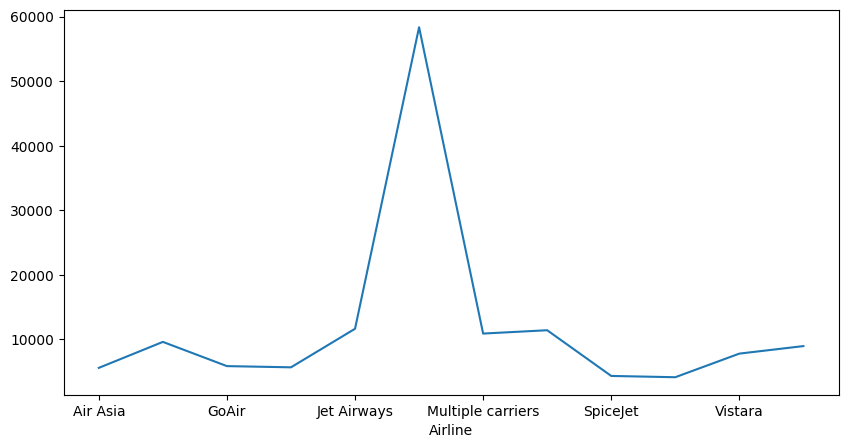

In [90]:
data.groupby("Airline")["Price"].mean().plot(figsize=(10,5))

In [98]:
airline=pd.get_dummies(data["Airline"],dtype=int)

In [99]:
airline

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,1,0,0,0,0,0,0,0,0,0,0,0
10679,0,1,0,0,0,0,0,0,0,0,0,0
10680,0,0,0,0,1,0,0,0,0,0,0,0
10681,0,0,0,0,0,0,0,0,0,0,1,0


<Axes: xlabel='Source'>

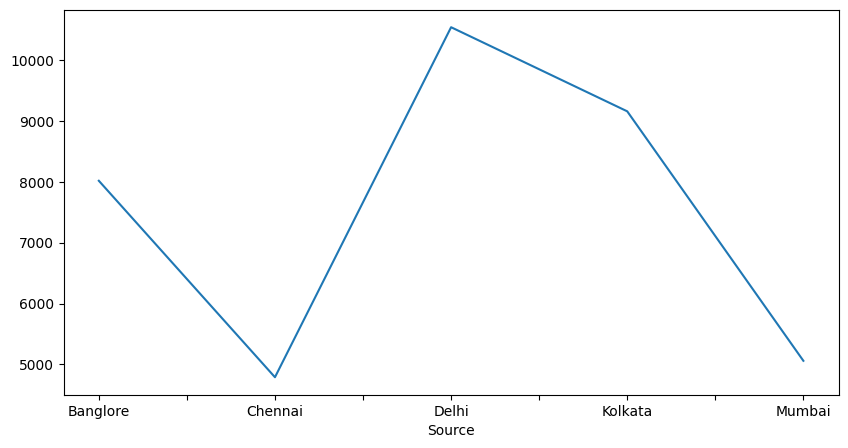

In [101]:
data.groupby("Source")["Price"].mean().plot(figsize=(10,5))

In [102]:
source=pd.get_dummies(data["Source"],dtype=int)

In [103]:
source

,Banglore,Chennai,Delhi,Kolkata,Mumbai
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,1,0,0,0,0
...,...,...,...,...,...
10678,0,0,0,1,0
10679,0,0,0,1,0
10680,1,0,0,0,0
10681,1,0,0,0,0


In [104]:
destination=pd.get_dummies(data["Destination"],dtype=int)

In [105]:
destination

,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,0,1
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,0,1
...,...,...,...,...,...,...
10678,1,0,0,0,0,0
10679,1,0,0,0,0,0
10680,0,0,1,0,0,0
10681,0,0,0,0,0,1


In [115]:
data["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [108]:
# there are 4 steps so we can use ordinal encoding to replace it by 0 to 4

In [118]:
data['Total_Stops']=data["Total_Stops"].replace(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],[0,2,1,3,4])

In [119]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_month,journey_day,departure_hour,departure_minute,arrival_hour,arrival_minute,Total_stops,Total_stop
0,IndiGo,Banglore,New Delhi,2h 50m,0,3897,3,24,22,20,1,1,0,0
1,Air India,Kolkata,Banglore,7h 25m,2,7662,5,1,5,50,13,13,2,2
2,Jet Airways,Delhi,Cochin,19h,2,13882,6,9,9,25,4,4,2,2
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218,5,12,18,5,23,23,1,1
4,IndiGo,Banglore,New Delhi,4h 45m,1,13302,3,1,16,50,21,21,1,1


In [120]:
data.drop(["Airline",'Source','Destination'],axis=1,inplace=True)


In [129]:
# add 3 coumns to data frame
data=pd.concat([data,airline,source,destination],axis=1)

In [124]:
pd.set_option("display.max_columns",None)

In [125]:
data.head()

,Duration,Total_Stops,Price,journey_month,journey_day,departure_hour,departure_minute,arrival_hour,arrival_minute,Total_stops,Total_stop
0,2h 50m,0,3897,3,24,22,20,1,1,0,0
1,7h 25m,2,7662,5,1,5,50,13,13,2,2
2,19h,2,13882,6,9,9,25,4,4,2,2
3,5h 25m,1,6218,5,12,18,5,23,23,1,1
4,4h 45m,1,13302,3,1,16,50,21,21,1,1


In [126]:
data.drop(['Total_stops','Total_stop'],axis=1,inplace=True)

In [130]:
data

,Duration,Total_Stops,Price,journey_month,journey_day,departure_hour,departure_minute,arrival_hour,arrival_minute,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Banglore,Chennai,Delhi,Kolkata,Mumbai,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,2h 50m,0,3897,3,24,22,20,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,7h 25m,2,7662,5,1,5,50,13,13,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,19h,2,13882,6,9,9,25,4,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,5h 25m,1,6218,5,12,18,5,23,23,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,4h 45m,1,13302,3,1,16,50,21,21,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2h 30m,0,4107,4,9,19,55,22,22,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
10679,2h 35m,0,4145,4,27,20,45,23,23,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
10680,3h,0,7229,4,27,8,20,11,11,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
10681,2h 40m,0,12648,3,1,11,30,14,14,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1


In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Duration                           10682 non-null  object
 1   Total_Stops                        10682 non-null  int64 
 2   Price                              10682 non-null  int64 
 3   journey_month                      10682 non-null  int32 
 4   journey_day                        10682 non-null  int32 
 5   departure_hour                     10682 non-null  int32 
 6   departure_minute                   10682 non-null  int32 
 7   arrival_hour                       10682 non-null  int32 
 8   arrival_minute                     10682 non-null  int32 
 9   Air Asia                           10682 non-null  int64 
 10  Air India                          10682 non-null  int64 
 11  GoAir                              10682 non-null  int64 
 12  IndiGo   

In [132]:
# convert duration into hour and minutes
data["duration_hour"]=data["Duration"].str.split().str[0]
data["duration_minutes"]=data["Duration"].str.split().str[1]

In [133]:
data.head()

,Duration,Total_Stops,Price,journey_month,journey_day,departure_hour,departure_minute,arrival_hour,arrival_minute,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Banglore,Chennai,Delhi,Kolkata,Mumbai,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,duration_hour,duration_minutes
0,2h 50m,0,3897,3,24,22,20,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2h,50m
1,7h 25m,2,7662,5,1,5,50,13,13,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,7h,25m
2,19h,2,13882,6,9,9,25,4,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,19h,NaN
3,5h 25m,1,6218,5,12,18,5,23,23,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,5h,25m
4,4h 45m,1,13302,3,1,16,50,21,21,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,4h,45m


In [134]:
data.drop("Duration",axis=1,inplace=True)

In [135]:
data.head()

,Total_Stops,Price,journey_month,journey_day,departure_hour,departure_minute,arrival_hour,arrival_minute,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Banglore,Chennai,Delhi,Kolkata,Mumbai,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,duration_hour,duration_minutes
0,0,3897,3,24,22,20,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2h,50m
1,2,7662,5,1,5,50,13,13,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,7h,25m
2,2,13882,6,9,9,25,4,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,19h,NaN
3,1,6218,5,12,18,5,23,23,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,5h,25m
4,1,13302,3,1,16,50,21,21,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,4h,45m


In [136]:
data.fillna(0,inplace=True)

In [137]:
data.head()

,Total_Stops,Price,journey_month,journey_day,departure_hour,departure_minute,arrival_hour,arrival_minute,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Banglore,Chennai,Delhi,Kolkata,Mumbai,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,duration_hour,duration_minutes
0,0,3897,3,24,22,20,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2h,50m
1,2,7662,5,1,5,50,13,13,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,7h,25m
2,2,13882,6,9,9,25,4,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,19h,0
3,1,6218,5,12,18,5,23,23,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,5h,25m
4,1,13302,3,1,16,50,21,21,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,4h,45m


In [163]:
# to remove h & m in hour & minute column
data["duration_hour"]=data["duration_hour"].replace("[h]","",regex=True)
data["duration_hour"]=data["duration_hour"].replace("[m]","",regex=True)
data["duration_minutes"]=data["duration_minutes"].replace("[m]","",regex=True)

In [164]:
data.head()

,Total_Stops,Price,journey_month,journey_day,departure_hour,departure_minute,arrival_hour,arrival_minute,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Banglore,Chennai,Delhi,Kolkata,Mumbai,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,duration_hour,duration_minutes
0,0,3897,3,24,22,20,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,int,int
1,2,7662,5,1,5,50,13,13,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,int,int
2,2,13882,6,9,9,25,4,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,int,int
3,1,6218,5,12,18,5,23,23,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,int,int
4,1,13302,3,1,16,50,21,21,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,int,int


In [166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Total_Stops                        10682 non-null  int64 
 1   Price                              10682 non-null  int64 
 2   journey_month                      10682 non-null  int32 
 3   journey_day                        10682 non-null  int32 
 4   departure_hour                     10682 non-null  int32 
 5   departure_minute                   10682 non-null  int32 
 6   arrival_hour                       10682 non-null  int32 
 7   arrival_minute                     10682 non-null  int32 
 8   Air Asia                           10682 non-null  int64 
 9   Air India                          10682 non-null  int64 
 10  GoAir                              10682 non-null  int64 
 11  IndiGo                             10682 non-null  int64 
 12  Jet Airwa

In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Total_Stops                        10682 non-null  int64 
 1   Price                              10682 non-null  int64 
 2   journey_month                      10682 non-null  int32 
 3   journey_day                        10682 non-null  int32 
 4   departure_hour                     10682 non-null  int32 
 5   departure_minute                   10682 non-null  int32 
 6   arrival_hour                       10682 non-null  int32 
 7   arrival_minute                     10682 non-null  int32 
 8   Air Asia                           10682 non-null  int64 
 9   Air India                          10682 non-null  int64 
 10  GoAir                              10682 non-null  int64 
 11  IndiGo                             10682 non-null  int64 
 12  Jet Airwa

In [170]:
data["duration_hour"].unique()

array(['int'], dtype=object)

In [171]:
data["duration_minutes"].unique()

array(['int'], dtype=object)

In [172]:
data["duration_hour"]=pd.to_numeric(data["duration_hour"],errors="coerce")
data["duration_minutes"]=pd.to_numeric(data["duration_minutes"],errors="coerce")

In [174]:
# now we will change the object into int
data[["duration_hour","duration_minutes"]]=data[["duration_hour","duration_minutes"]].fillna(0).astype(int)

In [175]:
data

,Total_Stops,Price,journey_month,journey_day,departure_hour,departure_minute,arrival_hour,arrival_minute,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Banglore,Chennai,Delhi,Kolkata,Mumbai,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,duration_hour,duration_minutes
0,0,3897,3,24,22,20,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,2,7662,5,1,5,50,13,13,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
2,2,13882,6,9,9,25,4,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,1,6218,5,12,18,5,23,23,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
4,1,13302,3,1,16,50,21,21,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,4,9,19,55,22,22,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
10679,0,4145,4,27,20,45,23,23,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
10680,0,7229,4,27,8,20,11,11,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
10681,0,12648,3,1,11,30,14,14,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [176]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Total_Stops                        10682 non-null  int64
 1   Price                              10682 non-null  int64
 2   journey_month                      10682 non-null  int32
 3   journey_day                        10682 non-null  int32
 4   departure_hour                     10682 non-null  int32
 5   departure_minute                   10682 non-null  int32
 6   arrival_hour                       10682 non-null  int32
 7   arrival_minute                     10682 non-null  int32
 8   Air Asia                           10682 non-null  int64
 9   Air India                          10682 non-null  int64
 10  GoAir                              10682 non-null  int64
 11  IndiGo                             10682 non-null  int64
 12  Jet Airways            

In [177]:
x=data.drop("Price",axis=1)
y=data.Price

In [178]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=0)

In [179]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [180]:
model.score(x_train,y_train)

0.6321657058834524

In [181]:
model.score(x_test,y_test)

0.5888843203002667

# Feature selection

In [194]:
# to check the importance of the features
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()

In [189]:
model.fit(x,y)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,False
,oob_score,False


In [192]:
a=pd.Series(model.feature_importances_,index=x.columns)
a.nlargest(32)

Total_Stops                          0.288068
Jet Airways                          0.150725
journey_day                          0.145727
Jet Airways Business                 0.067676
journey_month                        0.055799
departure_hour                       0.040551
departure_minute                     0.031868
arrival_minute                       0.027456
arrival_hour                         0.027086
Delhi                                0.022624
IndiGo                               0.018745
Multiple carriers                    0.017759
Cochin                               0.017303
New Delhi                            0.016490
Air India                            0.014828
Delhi                                0.012889
Hyderabad                            0.008898
Banglore                             0.008893
Mumbai                               0.007860
Vistara                              0.006108
SpiceJet                             0.003360
Banglore                          

<Axes: >

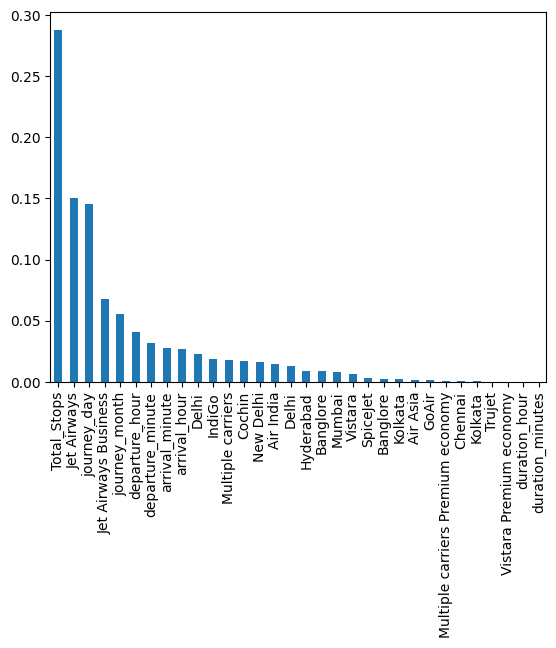

In [193]:
a=pd.Series(model.feature_importances_,index=x.columns)
a.nlargest(32).plot(kind="bar")

# Try every model at one time

In [195]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

In [200]:
all_models=[DecisionTreeRegressor,KNeighborsRegressor,RandomForestRegressor,AdaBoostRegressor]
for i in all_models:
    model=i()
    model=model.fit(x_train,y_train)
    print(i,"accuracy",model.score(x_test,y_test))

<class 'sklearn.tree._classes.DecisionTreeRegressor'> accuracy 0.70419535009456
<class 'sklearn.neighbors._regression.KNeighborsRegressor'> accuracy 0.4465559919496098
<class 'sklearn.ensemble._forest.RandomForestRegressor'> accuracy 0.8066136369216279
<class 'sklearn.ensemble._weight_boosting.AdaBoostRegressor'> accuracy 0.1961785790554318
